# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [47]:
!pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [56]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []t

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

In [58]:
print(cities)

['kulhudhuffushi', 'ushuaia', 'vadso', 'lautoka', 'fale old settlement', 'albany', 'geraldton', 'ancud', 'nemuro', 'bilibino', 'merizo village', 'waitangi', 'carnarvon', 'riviere-du-loup', 'lihue', 'puerto san jose', 'olonkinbyen', 'strzelin', 'kiunga', 'champerico', 'murun-kuren', 'port-aux-francais', 'galle', 'salisbury', 'stanley', 'utrik', 'margaret river', 'hermanus', 'constantia', 'edinburgh of the seven seas', 'ahar', 'west island', 'hawaiian paradise park', 'solnechnyy', 'ponte vedra beach', 'grytviken', 'papatowai', 'petropavlovsk-kamchatsky', 'afaahiti', 'katsuura', 'santo antonio do ica', 'pyshma', 'puerto baquerizo moreno', 'miles city', 'adamstown', 'jamestown', 'gorgoram', 'taulaga', 'lhuentse', 'bor', "nar'yan-mar", 'blackmans bay', 'borovskoy', 'viedma', 'nieuw amsterdam', 'bredasdorp', 'pacific grove', 'maracacume', "st. john's", 'akureyri', 'tiszafoldvar', 'ilulissat', 'kerikeri', 'sulak', 'whitehorse', 'tsiombe', 'minas de marcona', 'ahau', 'queenstown', 'port elizab

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [76]:
for i, city in enumerate(cities):
    city_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    except:
        print("City not found. Skipping...")
        pass
    break

In [78]:
city_weather

{'coord': {'lon': 73.07, 'lat': 6.6221},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 28.5,
  'feels_like': 32.15,
  'temp_min': 28.5,
  'temp_max': 28.5,
  'pressure': 1010,
  'humidity': 73,
  'sea_level': 1010,
  'grnd_level': 1010},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 295, 'gust': 6.94},
 'clouds': {'all': 73},
 'dt': 1722730706,
 'sys': {'country': 'MV', 'sunrise': 1722733323, 'sunset': 1722777931},
 'timezone': 18000,
 'id': 1337613,
 'name': 'Kulhudhuffushi',
 'cod': 200}

In [92]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kulhudhuffushi
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vadso
Processing Record 4 of Set 1 | lautoka
Processing Record 5 of Set 1 | fale old settlement
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | nemuro
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | merizo village
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | riviere-du-loup
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | puerto san jose
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | strzelin
Processing Record 19 of Set 1 | kiunga
Processing Record 20 of Set 1 | champerico
Processing Record 21 of Set 1 | murun-kuren
Processing Record 22 of Set 1 | port-aux-francais
Processi

In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kulhudhuffushi,6.6221,73.0700,28.50,73,73,5.82,MV,1722730706
1,ushuaia,-54.8000,-68.3000,-1.19,64,100,4.63,AR,1722731214
2,vadso,70.0744,29.7487,10.49,87,100,4.12,NO,1722731215
3,lautoka,-17.6167,177.4667,26.92,69,75,5.66,FJ,1722731216
4,fale old settlement,-9.3852,-171.2468,27.70,79,63,5.95,TK,1722731217
...,...,...,...,...,...,...,...,...,...
587,magadan,59.5667,150.8000,14.86,52,4,1.01,RU,1722731374
588,borsa,47.6553,24.6633,15.33,98,100,1.76,RO,1722731881
589,rabaul,-4.1967,152.1721,28.53,72,81,5.48,PG,1722731882
590,aizawl,23.7333,92.7167,22.27,98,99,0.67,IN,1722731883


In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kulhudhuffushi,6.6221,73.0700,28.50,73,73,5.82,MV,1722730706
1,ushuaia,-54.8000,-68.3000,-1.19,64,100,4.63,AR,1722731214
2,vadso,70.0744,29.7487,10.49,87,100,4.12,NO,1722731215
3,lautoka,-17.6167,177.4667,26.92,69,75,5.66,FJ,1722731216
4,fale old settlement,-9.3852,-171.2468,27.70,79,63,5.95,TK,1722731217


In [107]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [109]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kulhudhuffushi,6.6221,73.0700,28.50,73,73,5.82,MV,1722730706
1,ushuaia,-54.8000,-68.3000,-1.19,64,100,4.63,AR,1722731214
2,vadso,70.0744,29.7487,10.49,87,100,4.12,NO,1722731215
3,lautoka,-17.6167,177.4667,26.92,69,75,5.66,FJ,1722731216
4,fale old settlement,-9.3852,-171.2468,27.70,79,63,5.95,TK,1722731217


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

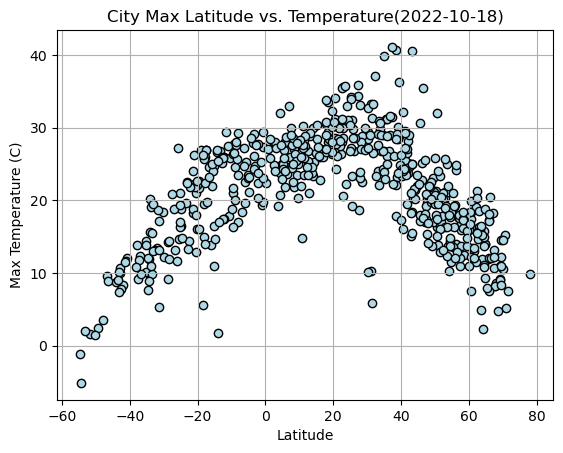

In [111]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
x_axis = latitude
y_axis = temperature
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

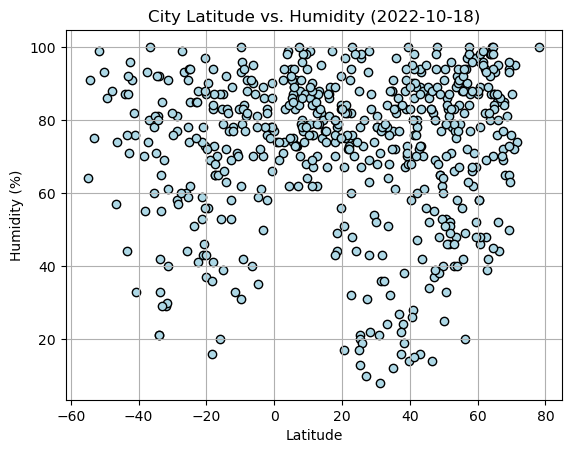

In [113]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
x_axis = latitude
y_axis = humidity
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

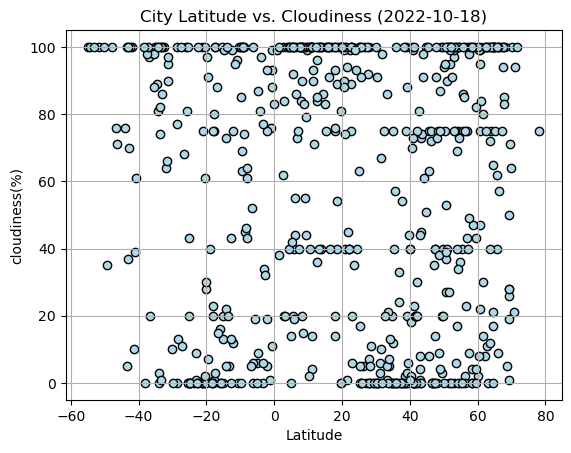

In [115]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
x_axis = latitude
y_axis = cloudiness
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("cloudiness(%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

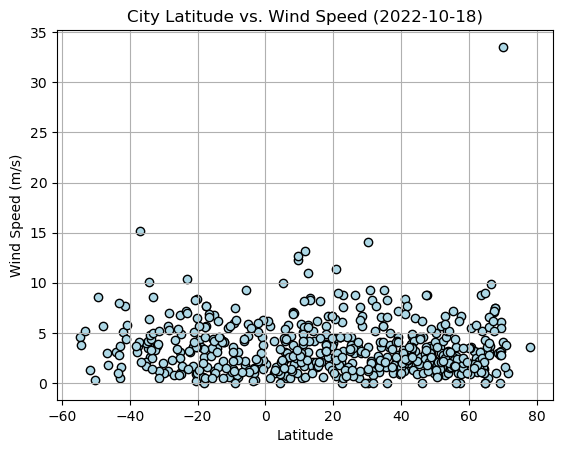

In [117]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
x_axis = latitude
y_axis = wind_speed
plt.scatter(x_axis, y_axis, facecolors="lightblue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
import scipy.stats as st

def linear_regression_plot(df, x_col, y_col, title, color="lightblue"):
    x_data = df[x_col]
    y_data = df[y_col]

    linear_regression = linregress(x_data, y_data)
    # print(linear_regression)
    y_regression = x_data * linear_regression.slope + linear_regression.intercept  #mx +b =y (slop=m, b=intercept, x=value)
    # print(y_regression)
    
    plt.scatter(x_data, y_data, facecolors=color, edgecolors="black")
    
    linear_equation = "y = " + str(round(linear_regression.slope,2)) + "x + " + str(round(linear_regression.intercept,2))
    annotation_x = x_data.min()
    annotation_y = y_data.max()
    
    plt.plot(x_data, y_regression, "-", color="red")
    plt.annotate(linear_equation, xy=(annotation_x, annotation_y), color="red")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    print(f"The r-value is: {linear_regression.rvalue}")
    plt.show()

In [121]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kulhudhuffushi,6.6221,73.0700,28.50,73,73,5.82,MV,1722730706
2,vadso,70.0744,29.7487,10.49,87,100,4.12,NO,1722731215
5,albany,42.6001,-73.9662,24.77,72,81,1.52,US,1722731218
8,nemuro,43.3236,145.5750,18.34,93,73,4.64,JP,1722731222
9,bilibino,68.0546,166.4372,8.56,65,100,0.99,RU,1722731223


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,-1.19,64,100,4.63,AR,1722731214
3,lautoka,-17.6167,177.4667,26.92,69,75,5.66,FJ,1722731216
4,fale old settlement,-9.3852,-171.2468,27.70,79,63,5.95,TK,1722731217
6,geraldton,-28.7667,114.6000,9.23,81,0,5.66,AU,1722731219
7,ancud,-41.8697,-73.8203,8.32,91,100,5.11,CL,1722730684


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6818577999569618


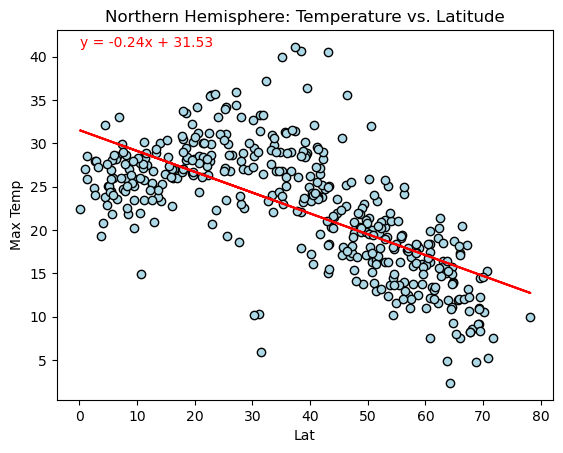

In [128]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Max Temp", "Northern Hemisphere: Temperature vs. Latitude", color="lightblue")

The r-value is: 0.7953280078501177


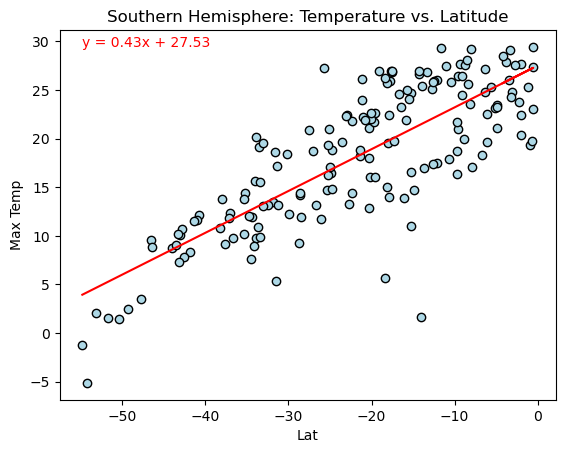

In [130]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Max Temp", "Southern Hemisphere: Temperature vs. Latitude", color="lightblue")

**Discussion about the linear relationship:** The northern hempisphere has a stronger linear relationship than the southern hemisphere. Both graphs show the closer to the equator the temper increases while further away from the equator the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.026721058818127655


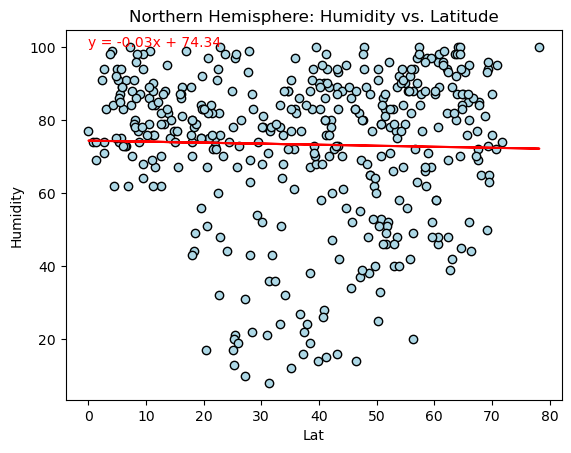

In [132]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Humidity", "Northern Hemisphere: Humidity vs. Latitude", color="lightblue")

The r-value is: 0.013916616632849231


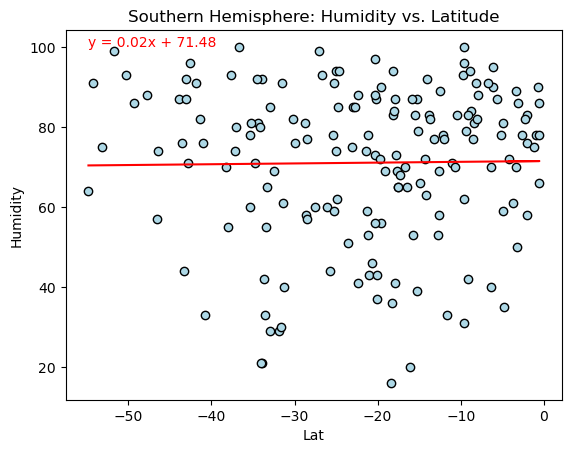

In [134]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Humidity", "Southern Hemisphere: Humidity vs. Latitude", color="lightblue")

**Discussion about the linear relationship:** The northern and southern hempisphere do not have a strong linear relationship. The northern hemisphere tends to be more humid further away from the equator while the southern is pretty evenly distributed and latitude does not play much of a factor.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.1035335163275537


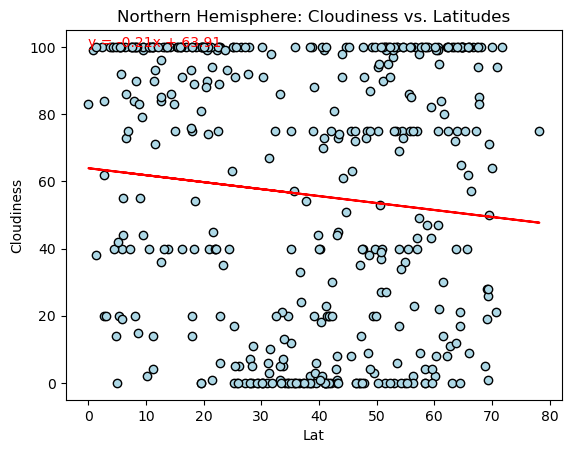

In [136]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Cloudiness", "Northern Hemisphere: Cloudiness vs. Latitudes", color="lightblue")

The r-value is: -0.22587227244480168


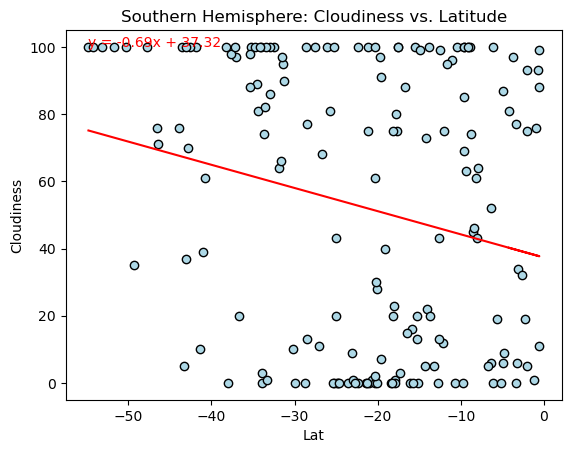

In [138]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Cloudiness", "Southern Hemisphere: Cloudiness vs. Latitude", color="lightblue")

**Discussion about the linear relationship:** The northern and southern hempisphere do not have a strong linear relationship. The northern hemisphere shows the further way from the equator has more cloud coverage while its is the opposit for the southern hemisphere.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.052752699940397225


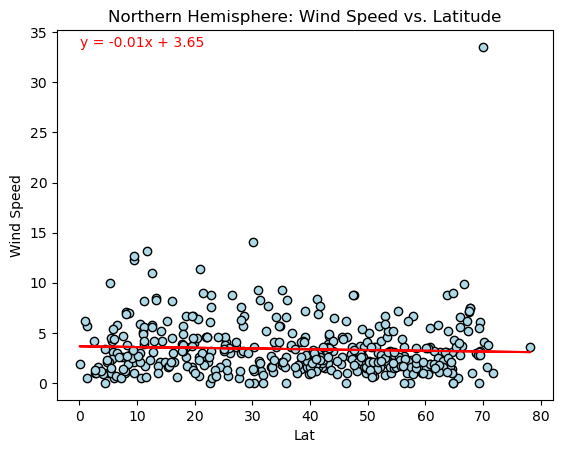

In [140]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, "Lat", "Wind Speed", "Northern Hemisphere: Wind Speed vs. Latitude", color="lightblue")

The r-value is: -0.133435348653944


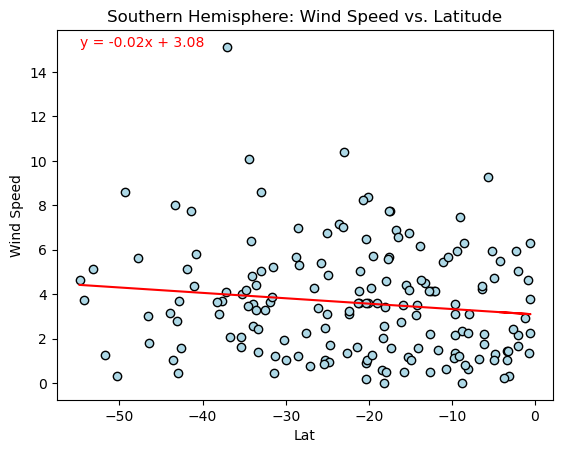

In [142]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, "Lat", "Wind Speed", "Southern Hemisphere: Wind Speed vs. Latitude", color="lightblue")

**Discussion about the linear relationship:** The northern and the southern hempisphere have a strong linear relationship. The closer to the equator the lower the wind speed while the further away from the equator the higher the wind speed gets.